In [12]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

<h1>Variante 1 "Garnichts machen" </h1>

In [2]:
df1 = pd.read_csv('data/test_and_training_data/v1_data_dog_normal.csv')
df1.head()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number,breuni_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,fashion_lifestyle_elite
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,fashion_lifestyle_elite
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,main_stream
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,fashion_lifestyle_elite
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,trendy


In [3]:
dogStr_df = df1[['breuni_class']]
dogStr_df.head()

,breuni_class
0,fashion_lifestyle_elite
1,fashion_lifestyle_elite
2,main_stream
3,fashion_lifestyle_elite
4,trendy


In [4]:
dogNoStr_df = df1.drop(columns='breuni_class')
dogNoStr_df.head()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0


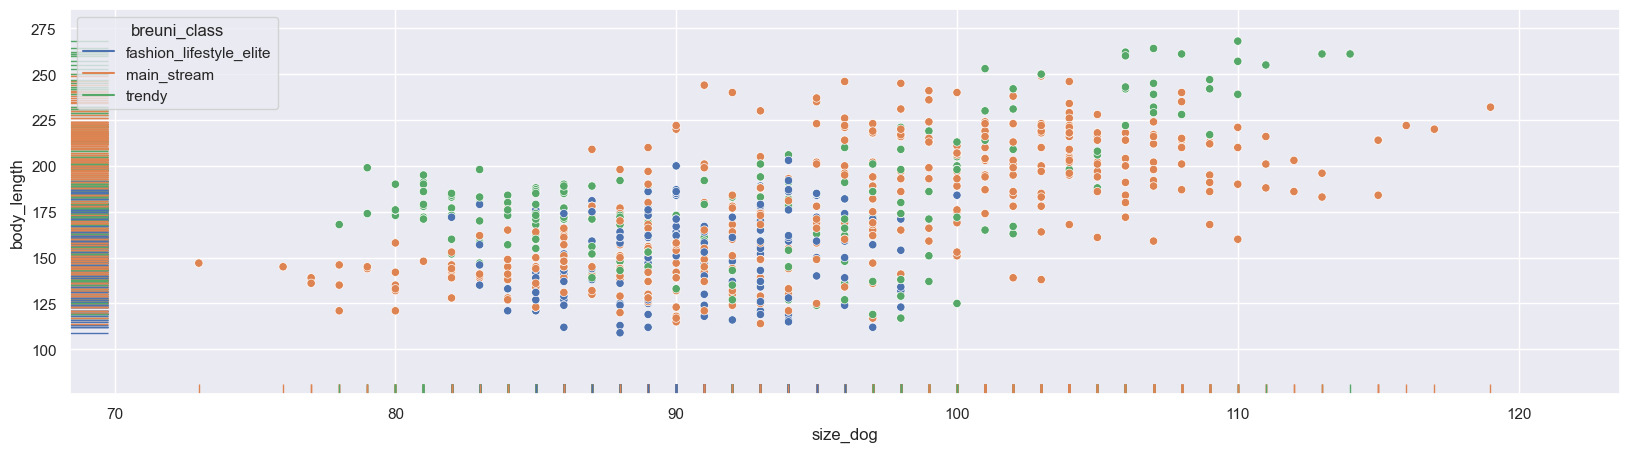

In [5]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df1, x ="size_dog",y="body_length",hue='breuni_class')
sns.rugplot(data=df1, x ="size_dog",y="body_length",hue='breuni_class')
plt.show()



<h1>Variante 2 "PCA mit Standardisierung" </h1>

In [6]:
pca2= make_pipeline(
    StandardScaler(),PCA(n_components=18)
)
pca2.fit_transform(dogNoStr_df)
pca2['pca'].explained_variance_ratio_

array([5.23842715e-01, 1.67922206e-01, 1.05489449e-01, 6.54626098e-02,
       5.07963290e-02, 2.96175664e-02, 1.97685972e-02, 1.22336746e-02,
       8.76239809e-03, 5.05408102e-03, 3.50247758e-03, 2.44109126e-03,
       1.94607302e-03, 1.18993618e-03, 8.85813314e-04, 7.20022354e-04,
       3.44709645e-04, 2.02501932e-05])

In [7]:
pca2['pca'].components_

array([[ 2.74831771e-01,  2.95010714e-01,  3.04449087e-01,
         2.67736007e-01,  8.05023115e-02,  9.67344418e-02,
         3.16974201e-01, -3.13578155e-01,  3.13919564e-01,
         2.82333728e-01,  3.09412520e-01,  3.14367158e-01,
         2.71718519e-01, -2.11828921e-02,  4.14663527e-02,
         5.76364277e-02,  2.94889050e-02,  7.35592120e-02],
       [-1.27658782e-01,  1.30073139e-01, -7.48089621e-02,
        -1.88895631e-01, -1.21175308e-01,  1.10227254e-02,
         4.71040360e-02,  1.33882597e-02,  5.99504212e-02,
         1.15678806e-01,  6.19071507e-02,  5.16105865e-02,
         2.08657818e-01,  4.89069068e-01, -5.70936548e-02,
        -1.24691532e-01, -5.40654749e-01, -5.39434552e-01],
       [-1.19287990e-01, -2.99793011e-02, -5.54364072e-02,
         2.74808687e-01,  6.42808859e-01,  5.92125977e-01,
        -9.63548068e-02,  5.65554126e-02, -1.09164899e-01,
        -1.70186147e-02,  5.67570534e-02, -1.07764904e-01,
        -3.12995047e-02,  2.85044378e-01, -1.15755322e

In [8]:
pca2= make_pipeline(
    StandardScaler(),PCA(n_components=5)
    
)
pca2.fit_transform(dogNoStr_df)
pca2['pca'].explained_variance_ratio_

array([0.52384272, 0.16792221, 0.10548945, 0.06546261, 0.05079633])

In [9]:
df2 = pd.DataFrame(pca2.fit_transform(dogNoStr_df))
df2['breuni_class'] = dogStr_df
df2.head()

,0,1,2,3,4,breuni_class
0,0.329746,-0.215835,0.997248,0.171485,0.081947,fashion_lifestyle_elite
1,-1.594478,-0.422979,-0.370002,0.231497,0.691322,fashion_lifestyle_elite
2,3.760799,0.186851,0.087971,1.202770,0.729704,main_stream
3,-1.742311,-2.825632,0.111181,0.374927,-0.370714,fashion_lifestyle_elite
4,0.549668,4.764098,11.689234,0.163830,3.257210,trendy


In [9]:
df2.to_csv('data/test_and_training_data/v2_data_dog_PCA+standardized.csv', index=False)

<AxesSubplot: >

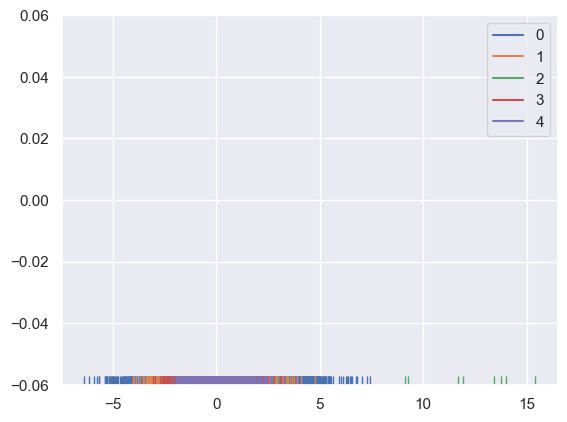

In [17]:
#sns.pairplot(data=df2)
#plt.show()
sns.rugplot(data=df2, height=0.025, expand_margins=True, palette=None, hue_order=None, hue_norm=None, legend=True, ax=None)

<h1>Variante 3 "PCA ohne Standardisierung" </h1>

In [12]:
pca3 = PCA(n_components=18)

In [13]:
pca3.fit_transform(dogNoStr_df)
pca3.explained_variance_ratio_

array([9.59254724e-01, 1.79839369e-02, 1.19578103e-02, 3.93789057e-03,
       1.96638556e-03, 1.33164194e-03, 1.14732207e-03, 7.72773169e-04,
       6.25803575e-04, 3.26260692e-04, 2.59883176e-04, 1.63508071e-04,
       1.29184631e-04, 6.82487246e-05, 4.65151738e-05, 1.93942985e-05,
       6.73580871e-06, 1.98111044e-06])

1. 95,92%
2. 1,79%
3. 1,19%
4. 0,39%

In [14]:
pca3 = PCA(n_components=1)

In [15]:
df3 = pd.DataFrame(pca3.fit_transform(dogNoStr_df))
df3['breuni_class'] = dogStr_df
df3.head()

,0,breuni_class
0,-57.332839,fashion_lifestyle_elite
1,-116.911811,fashion_lifestyle_elite
2,211.526976,main_stream
3,-141.291488,fashion_lifestyle_elite
4,-98.423682,trendy


In [16]:
df3.to_csv('data/test_and_training_data/v3_data_dog_PCA-standardized.csv', index=False)

<h1>Variante 4 "Iso Maps" </h1>

In [36]:
iso = Isomap(n_components=1)
df4 = pd.DataFrame(iso.fit_transform(dogNoStr_df))
df4['breuni_class'] = dogStr_df
df4.head()
df4.to_csv('data/test_and_training_data/v4.1_data_dog_IsoMaps.csv', index=False)

In [37]:
iso = Isomap(n_components=2)
df4 = pd.DataFrame(iso.fit_transform(dogNoStr_df))
df4['breuni_class'] = dogStr_df
df4.head()
df4.to_csv('data/test_and_training_data/v4.2_data_dog_IsoMaps.csv', index=False)

In [38]:
iso = Isomap(n_components=3)
df4 = pd.DataFrame(iso.fit_transform(dogNoStr_df))
df4['breuni_class'] = dogStr_df
df4.head()
df4.to_csv('data/test_and_training_data/v4.3_data_dog_IsoMaps.csv', index=False)

In [39]:
iso = Isomap(n_components=4)
df4 = pd.DataFrame(iso.fit_transform(dogNoStr_df))
df4['breuni_class'] = dogStr_df
df4.head()
df4.to_csv('data/test_and_training_data/v4.4_data_dog_IsoMaps.csv', index=False)

In [40]:
iso = Isomap(n_components=5)
df4 = pd.DataFrame(iso.fit_transform(dogNoStr_df))
df4['breuni_class'] = dogStr_df
df4.head()
df4.to_csv('data/test_and_training_data/v4.5_data_dog_IsoMaps.csv', index=False)

<h1>Variante 5 "Locally Linear Embedding" </h1>

In [49]:
lle = LocallyLinearEmbedding(n_components=1)
df5 = pd.DataFrame(lle.fit_transform(dogNoStr_df))
df5['breuni_class'] = dogStr_df
df5.head()
df5.to_csv('data/test_and_training_data/v5.1_data_dog_LLE.csv', index=False)

In [50]:
lle = LocallyLinearEmbedding(n_components=2)
df5 = pd.DataFrame(lle.fit_transform(dogNoStr_df))
df5['breuni_class'] = dogStr_df
df5.head()
df5.to_csv('data/test_and_training_data/v5.2_data_dog_LLE.csv', index=False)

In [51]:
lle = LocallyLinearEmbedding(n_components=3)
df5 = pd.DataFrame(lle.fit_transform(dogNoStr_df))
df5['breuni_class'] = dogStr_df
df5.head()
df5.to_csv('data/test_and_training_data/v5.3_data_dog_LLE.csv', index=False)

In [52]:
lle = LocallyLinearEmbedding(n_components=4)
df5 = pd.DataFrame(lle.fit_transform(dogNoStr_df))
df5['breuni_class'] = dogStr_df
df5.head()
df5.to_csv('data/test_and_training_data/v5.4_data_dog_LLE.csv', index=False)

In [53]:
lle = LocallyLinearEmbedding(n_components=5)
df5 = pd.DataFrame(lle.fit_transform(dogNoStr_df))
df5['breuni_class'] = dogStr_df
df5.head()
df5.to_csv('data/test_and_training_data/v5.5_data_dog_LLE.csv', index=False)